# 2.7 Introduction to Linear Regressions

<b>In this notebook, we do three things:</b> 

1. We simulate the data (independent variable, x; dependent variable, y) such that y = 5 + 2*x + noise. 
2. We are going to demonstrate how to run a standard regression model to recover $\alpha$ and $\beta$:
    $y = \alpha + \beta * x + \epsilon$

3. We discuss how to read the results and interpretations. 

<b>Connection to 2.8 (our last notebook 😊 or 🙁):</b> 
 - 2.7 uses simulated data and conducts univariate regressions (only one independent variable)
 - 2.8 uses data imports and conducts multivariate regressions (multiple independent variables) 

In [2]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats            # Basic package for univariate regressions
import statsmodels.api as statsmod           # More sophisticated package for univariate and multivariate regressions

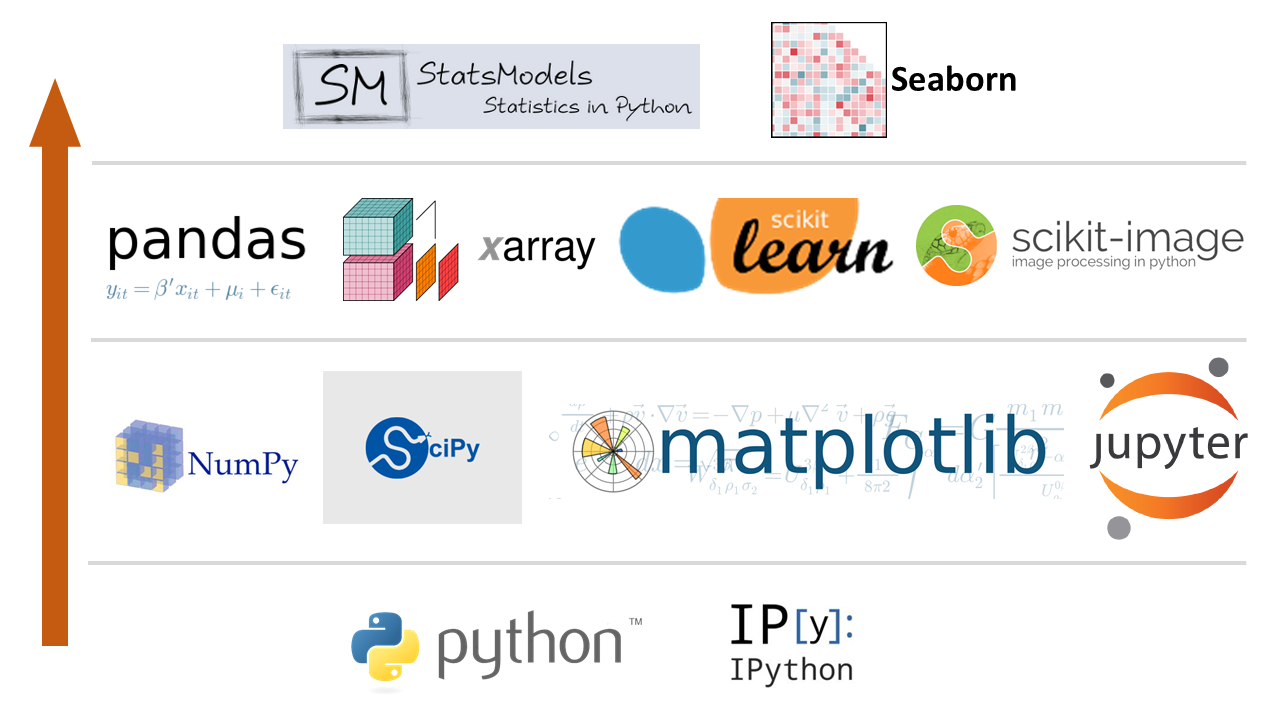

# 2.7.1 Simulating and Estimating a Univariate Regression Model

We will first simulate the data (independent variable, x; dependent variable, y) such that y = 5 + 2*x + noise. 

In [8]:
np.random.seed(100)
x = np.random.normal(2,5,(100,1))      # Independent random variable has mean of 2 and stdev of 5
w = np.random.normal(4,4,(100,1))      # Irrelevant random variable has mean of 4 and stdev of 4
e = np.random.normal(0,10,(100,1))     # Error term has mean of 0 and stdev of 10

alpha = 5
beta = 2
y = alpha + beta*x + e 

(100, 1)


In [3]:
print("y has mean of {:7.4f} and stdev of {:7.4f}".format(np.mean(y),np.std(y)))
print("x has mean of {:7.4f} and stdev of {:7.4f}".format(np.mean(x),np.std(x)))
print("e has mean of {:7.4f} and stdev of {:7.4f}".format(np.mean(e),np.std(e)))

y has mean of  9.0458 and stdev of 13.6350
x has mean of  1.4792 and stdev of  4.8488
e has mean of  1.0875 and stdev of 10.5979


In [4]:
# recall from 2.3 that np.corrcoef function uses row variables; [0,1] is to obtain the covariance term in the covariance-variance matrix
print("Correlation between x and y is {:7.4f}".format(np.corrcoef(x.T, y.T)[0,1]))
print("Correlation between x and e is {:7.4f}".format(np.corrcoef(x.T, e.T)[0,1]))

Correlation between x and y is  0.6339
Correlation between x and e is -0.0995


# 2.7.2 Scipy.stats.linregress

This is a simple function that you can use if you are primarily interested in slope coefficients in <b>univariate</b> regressions (with 1 explanatory/independent/x variable).

We have abbreviated module "scipy.stats" with "stats" above.

In [5]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [6]:
xy = np.hstack((x,y))       # notice (())
print(xy.shape)

(100, 2)


In [7]:
stats.linregress(xy)

LinregressResult(slope=1.7826041404613668, intercept=6.409067879570696, rvalue=0.633915834209586, pvalue=1.4476502069219012e-12, stderr=0.21969267977423987)

In [8]:
xy = np.vstack((x.T,y.T))
print(xy.shape)

(2, 100)


In [9]:
stats.linregress(xy)    # same, see the note below

LinregressResult(slope=1.7826041404613668, intercept=6.409067879570696, rvalue=0.633915834209586, pvalue=1.4476502069219012e-12, stderr=0.21969267977423987)

Note (from "help(stats.linregress)" above): 
        * x, y : array_like
        * Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.

In [10]:
beg = datetime.datetime.now()
stats.linregress(xy)
end = datetime.datetime.now()
print("Regression with sample size=100 runs in {}.".format((end-beg)))

Regression with sample size=100 runs in 0:00:00.003346.


    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xy)
t_stat = slope/std_err  # What does it mean? What is the null hypothesis?
p_const=0.05

print("R-squared: {:8.6f}".format(r_value**2))
print("Slope:     {:8.6f} (standard error: {:8.6f}, t-statistic: {:8.6f}, p-value:  {:8.6f})".format(slope,std_err,t_stat, p_const))
print("Intercept: {:8.6f} (standard error:  missing, t-statistic:  missing, p-value: missing)".format(intercept))

R-squared: 0.401849
Slope:     1.782604 (standard error: 0.219693, t-statistic: 8.114081, p-value:  0.050000)
Intercept: 6.409068 (standard error:  missing, t-statistic:  missing, p-value: missing)


### Notice that this function only provides t-statistic (and its corresponding p-value) of the slope coefficient

### Created fitted y given the model estimates

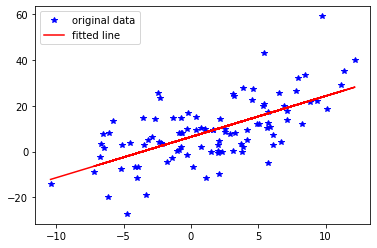

In [13]:
plt.plot(x, y, 'b*', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.savefig('2.7_plot.png')   # recall this function

### How about a multivariate regression of 'y' on 'x' and 'w'? Not with stats.lingress()!

In [14]:
xwy = np.hstack((x,w,y))
print(xwy.shape)

(100, 3)


In [15]:
stats.linregress(xwy)   

ValueError: If only `x` is given as input, it has to be of shape (2, N) or (N, 2), provided shape was (100, 3)

Final comment: scipy's linear regression function is looking for a 2-dimensional array where one of the dimensions must be 2

# 2.7.3 Statsmodels.api.OLS

This package generates more output than linregress() and let you include additional explanatory/independent/x variables. 

This package runs a bit slower than stats.linregress.

<b>Caveat: remember to add the column of ones (to estimate the intercept); recall, stats.linregress assumes an intercept in the estimation. </b>

In [16]:
help(statsmod.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [17]:
def reg_m(y, x):
    X = np.hstack((np.ones((len(x),1)), x))     # adds column of ones to X
    results = statsmod.OLS(y, X).fit()                # creates object containing regression results
    return results

In [18]:
beg = datetime.datetime.now()
print(reg_m(y, x).summary())
end = datetime.datetime.now()
print()
print("Regression with sample size=100 runs in {}.".format(end-beg))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     65.84
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.45e-12
Time:                        20:14:36   Log-Likelihood:                -377.46
No. Observations:                 100   AIC:                             758.9
Df Residuals:                      98   BIC:                             764.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4091      1.114      5.755      0.0

# 2.7.4 Interpreting Regression Output

<b>Typically, we are interested in the following question: whether a regression coefficient is statistically different from zero. </b>

- "No. Observations" tells us how many observations were included in our regression. Unlike some statistical packages, Statsmodels.api.OLS will return an error message if any of the $y$ or $x$ values are missing. Unlike some numpy functions, however, Statsmodels.api.OLS allows data to be sorted in columns or rows.
- "Df Model" tells us how many explanatory variables are included in the regression, excluding the constant.
- "R-squared" tells us what fraction of the total variation in the dependent variable, $y$, can be explained by variation in the explanatory variable(s). In a univariate regression, we can calculate R-squared by squaring the correlation coefficient between $x$ and $y$.
- "coef" for "const" is the estimated intercept.
- "coef" for "x1" is the estimated slope on the only independent variable.
- "std err" measures the precision of our estimated intercept and slope.
- "t" is the t-statistic, which is simply the "coef" divided by the corresponding "std err". The larger this value, the less likely that the "coef" could have arisen by chance, if the population parameter were zero.
- "P>|t|" is the p-value associated with a two-sided hypothesis test that the population parameter is zero. For example, it tells us how likely we are to observe a slope coefficient that is greater than 1.8717 or less than -1.8717 when the population slope is zero.
- "[0.025  0.975]" tells us the lower and upper bounds of the 95% confidence interval for each parameter. In this example, we multiply the standard error by 1.984467454426692 and subtract from "coef" to obtain the lower bound. Similarly, we multiply the standard error by 1.984467454426692 and add to "coef" to obtain the upper bound. (In both cases, 1.984467454426692 is the 0.025% critical value for a t-statistic with 98 degrees of freedom; I asked Python to calculate this value below.)
- If we estimate 1 million regressions based on random samples generated by the same underlying statistical model, we expect the population parameter to fall inside the 95% confidence interval 95% percent of the time!




### We can directly access estimated coefficients and standard errors

In [19]:
reg_result = reg_m(y, x)

In [20]:
print(dir(reg_result))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_to

In [21]:
print(reg_result.params)                           # array containing parameter estimates
print(reg_result.bse)                              # array containing standard errors for parameter estimates

[6.40906788 1.78260414]
[1.11370199 0.21969268]


In [22]:
print(reg_result.params[0], reg_result.params[1])  # extracts each parameter estimate
print(reg_result.tvalues)                          # extracts (2,) containg both t-stats
print(reg_result.pvalues[1])                       # extracts p-value for slope

6.409067879570697 1.782604140461366
[5.75474221 8.11408073]
1.447650206921932e-12


### The p-value for the slope is based on a two-sided hypothesis test assuming 98 (100-2, or N-2) degrees of freedom

It tells us how likely we are to observe a t-statistic that is greater than or equal to 6.409 (or less than or equal to -6.409) when the true slope parameter is zero, under a t-distribution with df=98. 

In [23]:
tstat_slope = reg_result.tvalues[1]
stats.t.sf(np.abs(tstat_slope), 98)*2

1.447650206921932e-12

### We can plot the probability of a t-statistic being below a given value using the cumulative distribution function: stats.t.cdf()

In [ ]:
v = np.arange(-2.5,2.5,.01)
p = stats.t.cdf(v, 98, loc=0, scale=1)
plt.scatter(v,p, color='skyblue')
plt.show()

### We can ask Python to give us the interval (centered on zero) that has a given probability of containing the true parameter value. 

In [ ]:
stats.t.interval(0.90, 98, loc=0, scale=1)            # Critical values for 90% CI centered on zero

In [ ]:
stats.t.interval(0.95, 98, loc=0, scale=1)            # Critical values for 95% CI centered on zero

In [ ]:
stats.t.interval(0.99, 98, loc=0, scale=1)            # Critical values for 99% CI centered on zero

# 2.7.5 An teaser example: Estimating multivariate regressions

Below, I am adding a second explanatory variable ('w' from 2.7.1) to the regression by adding another column to the array of explanatory/independent/x variables.

y = a1 + a2 * x + a3 * w + epsilon 

In [ ]:
W = np.hstack((x,w))                # Array of independent variables now includes x and w
print(reg_m(y, W).summary())

<b>Notice that the 'coef' and 'std err' for 'const' and 'x1' are similar to those estimated previously, while the 'coef' for 'x2' is close to zero and the 95% confidence interval for 'x2' includes zero.</b>

## [ADDITIONAL TOPIC] Save data in npy (numpy's data format)

In [ ]:
np.save('2.7_x', x) # you should see a 2.7_x.npy file in the current working directory (extension .npy is a numpy array data file type)
# or you can write np.save('2.7_x.npy', x) 

In [ ]:
np.save('2.7_y', y)
np.save('2.7_w', w)

In [ ]:
#This code loads a particular numpy array data file
#x = np.load('2.7_x.npy')
#y = np.load('2.7_y.npy')
#w = np.load('2.7_w.npy')

### Save data in csv or txt

In [ ]:
x_list = [i[0] for i in x.tolist()]            # list comprehension to recover list from array
y_list = [i[0] for i in y.tolist()]            # list comprehension to recover list from array

In [ ]:
output = open("./2.7_xy.csv", 'w')
for i in range(len(y_list)):
    output.write("{}, {}\n".format(x_list[i], y_list[i]))
output.close()        

In [ ]:
output = open("./2.7_xy.txt", 'w')
for i in range(len(y_list)):
    output.write("{}, {}\n".format(x_list[i], y_list[i]))
output.close()    